[View in Colaboratory](https://colab.research.google.com/github/lvwuyunlifan/Colaboratory/blob/master/chapter4.ipynb)

##上传图片

face_template1.jpg，face_template2.jpg，faces.jpg，haarcascades/haarcascade_eye.xml，haarcascades/haarcascade_frontalface_default.xml，五个文件

In [0]:
from google.colab import files
import os 
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [10]:
! ls ./

datalab    face_template1.jpg  haarcascade_eye.xml
faces.jpg  face_template2.jpg  haarcascade_frontalface_default.xml


In [0]:
# 导入需要的包

import cv2
import numpy as np
import matplotlib.pyplot as plt
# 在浏览器页面上展示所需要的设置
%matplotlib inline


##FaceDetection_TemplateMatching.py

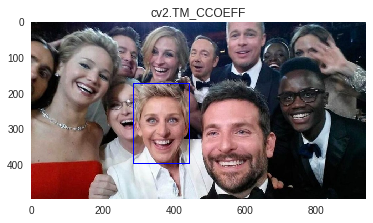

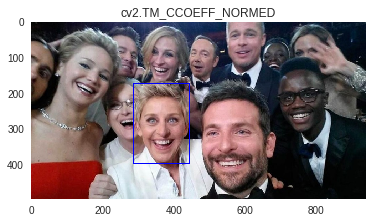

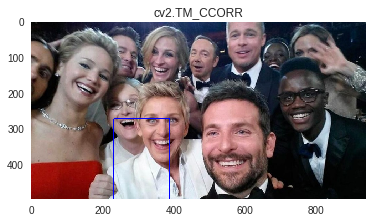

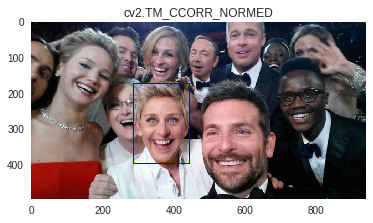

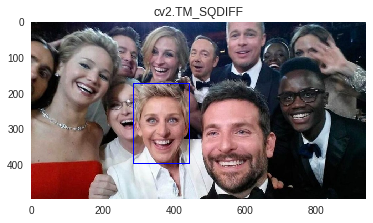

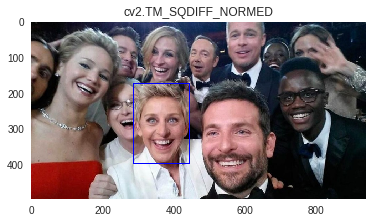

In [11]:
# 读取图片，彩色模式
img_color = cv2.imread('./faces.jpg',cv2.IMREAD_COLOR)
# 读取图片，灰度模式
img_gray = cv2.imread('./faces.jpg',cv2.IMREAD_GRAYSCALE)
# 读取人脸模板图片，灰度模式
template = cv2.imread('./face_template1.jpg',cv2.IMREAD_GRAYSCALE)
# 获取模板尺寸
w, h = template.shape[::-1]
# 模板匹配方法数组
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# 遍历匹配方法
for meth in methods:
  # 拷贝图片
  img_color2 = img_color.copy()
  img_gray2 = img_gray.copy()
  # 把字符串转换成代码
  method = eval(meth)
  # 模板匹配
  res = cv2.matchTemplate(img_gray2,template,method)
  # 获取匹配结果的最大、最小值，及其位置
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  # TM_SQDIFF 和 TM_SQDIFF_NORMED匹配方法：值越小，越相似
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      # 取最小值位置，作为矩形框左上角位置
      top_left = min_loc
  else:
      # 取最大值位置，作为矩形框左上角位置
      top_left = max_loc
  # 根据模板尺寸计算出：矩形框右下角位置
  bottom_right = (top_left[0] + w, top_left[1] + h)
  # 画矩形框
  cv2.rectangle(img_color2,top_left, bottom_right, 255, 2)
    # 显示画好矩形框的图片
  #     cv2.namedWindow(meth, cv2.WINDOW_AUTOSIZE)
  #     cv2.imshow(meth,img_color2)
  #     # 等待退出键
  #     cv2.waitKey(0)
  # # 销毁显示窗口
  # cv2.destroyAllWindows()
  img_color2 = img_color2[:,:,::-1]  # cv显示的模式是BGR,现在转化为plt的模式RGB
  plt.title(meth)  # 添加标头
  plt.grid(False) # 关闭网格线
  plt.imshow(img_color2)
  plt.show()  # 展示
  

##FaceDetection_Haar.py

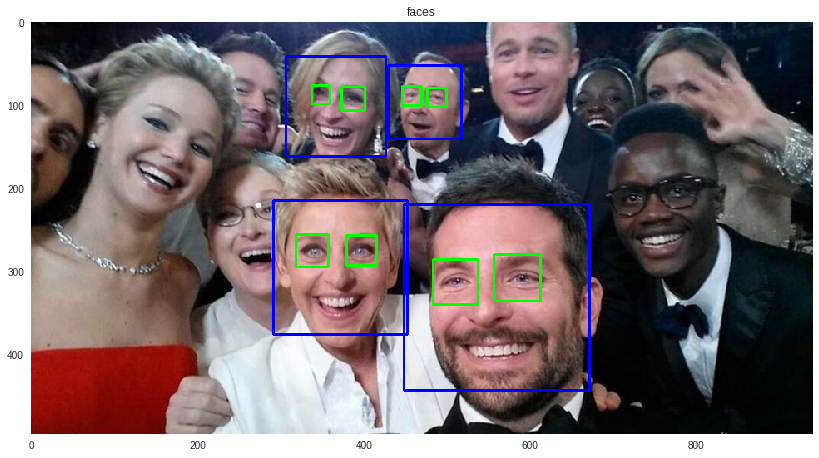

In [9]:
# 实例化人脸分类器
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
# 实例化眼睛分类器
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
# 读取测试图片
img = cv2.imread('./faces.jpg',cv2.IMREAD_COLOR)
# 将原彩色图转换成灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 开始在灰度图上检测人脸，输出是人脸区域的外接矩形框
faces = face_cascade.detectMultiScale(gray, 1.2, 8)
# 遍历人脸检测结果
for (x,y,w,h) in faces:
    # 在原彩色图上画人脸矩形框
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 获取该人脸矩形框的感兴趣区域RoI, 浅复制
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # 开始在人脸区域中检测眼睛，输出是眼睛区域的外接矩形框
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # 遍历眼睛检测结构
    for (ex,ey,ew,eh) in eyes:
	# 在原彩色图上画眼睛矩形框
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# 显示画好矩形框的图片
# cv2.namedWindow('faces', cv2.WINDOW_AUTOSIZE)
# cv2.imshow('faces',img)
# # 等待退出键
# cv2.waitKey(0)
# # 销毁显示窗口
# cv2.destroyAllWindows()
img = img[:,:,::-1]  # cv显示的模式是BGR,现在转化为plt的模式RGB
plt.figure(figsize=(14,18))  # 改变画布的大小16x10，可自行调整
plt.title('faces')
plt.grid(False) # 关闭网格线
plt.imshow(img)  
plt.show()  # 展示